<a href="https://colab.research.google.com/github/KimTaesuk11/Downloads/blob/main/ai_sc42x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC42x 
## 자연어처리 (Natural Language Processing)

# Part 1 : 개념 요약

> 다음의 키워드에 대해서 **한 줄**로 간단하게 요약해주세요. (세션 노트를 참고하여도 좋습니다.)<br/>
> **Tip : 아래 문제를 먼저 수행한 후 모델 학습 등 시간이 오래 걸리는 셀이 실행되는 동안 아래 내용을 작성하면 시간을 절약할 수 있습니다.**

**N421**
- Stopwords(불용어)
갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해 큰 의미가 없는 단어 토큰을 제거해야 한다.
- Stemming과 Lemmatization
Lemmatization이란 문장 속에서 다양한 형태로 활용된(inflected) 단어의 표제어(lemma)를 찾는 일을 뜻한다. 여기서 말하는 표제어란 사전에서 단어의 뜻을 찾을 때 쓰는 기본형이라고 생각하면 된다. 예를 들어, ‘아름다운’이 Lemmatization을 거치면 ‘아름답다’가 된다. Stemming과 비슷해 보이지만 중요한 차이가 있다. Stemming은 단어 그 자체만을 고려하지만 Lemmatization은 그 단어가 문장 속에서 어떤 품사(Part-of-speech)로 쓰였는지까지 판단한다.
- Bag-of-Words
단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법
- TF-IDF
정보 검색과 텍스트 마이닝에서 이용하는 가중치.
**N422**
- Word2Vec
단어 벡터 간 유의미한 유사도를 반영할 수 있도록 단어의 의미를 수치화 할 수 있는 방법
- fastText
하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주하며, 단어를 벡터로 만드는 또 다른 방법
**N423**
- RNN
입력과 출력을 시퀀스 단위로 처리하는 시퀀스(Sequence) 모델
- LSTM, GRU
LSTM :
기존의 RNN이 출력과 먼 위치에 있는 정보를 기억할 수 없다는 단점을 보완하여 장/단기 기억을 가능하게 설계한 신경망의 구조
GRU : 
LSTM에 비하여 파라미터수가 적기 때문에 연산 비용이 적게 들고, 구조도 더 간단하지만, 성능에서도 LSTM과 비슷한 결과 도출

- Attention
입력 시퀀스가 길어지면 출력 시퀀스의 정확도가 떨어지는 것을 보정해주기 위한 등장한 기법

# Part 2 : Fake/Real News Dataset

한 주간 자연어처리 기법을 배우면서 여러분은 다양한 기술들을 접했습니다.<br/>
어떻게 텍스트 데이터를 다뤄야 하는지, 텍스트를 벡터화 하는 법, 문서에서 토픽을 모델하는 법 등 다양한 NLP 기법을 배웠는데요.<br/>
이번 스프린트 챌린지에선 [Fake/Real News Dataset](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset)을 사용하여 배운 것들을 복습해보는 시간을 갖겠습니다.

**주의 : 모델의 성능을 최대한 끌어올리는 것이 아닌 모델 구동에 초점을 맞춰주세요.<br/>
모든 문제를 완료한 후에도 "시간이 남았다면" 정확도를 올리는 것에 도전하시는 것을 추천드립니다.**

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

In [6]:
# 코드 실행 전 seed를 지정하겠습니다.
import numpy as np
import pandas as pd
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

## 2.0 데이터셋을 불러옵니다.

- 위 캐글 링크에서 데이터셋을 받아 업로드 합니다.<br/>
(직접 업로드하게 되면 시간이 꽤 걸리므로 **drive_mount** 나 **kaggle 연동**하시는 것을 추천드립니다.)

- 'label' 열을 만들어 Fake = 1, True = 0 로 레이블링해줍니다.
- 두 파일을 합쳐 하나의 데이터프레임에 저장해 준 후 데이터를 섞어줍니다.

In [7]:
fake = pd.read_csv('/content/Fake.csv')
true = pd.read_csv('/content/True.csv')

In [8]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
true['label'] = 0
fake['label'] = 1

In [11]:
df = pd.concat([true,fake])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


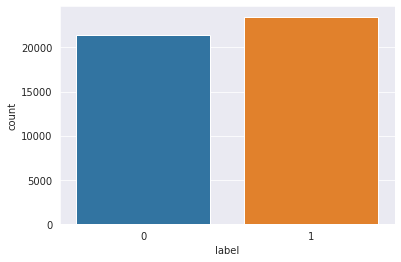

In [12]:
sns.set_style("darkgrid")
sns.countplot(df.label)

In [13]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [14]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


## 2.1 TF-IDF 를 활용하여 특정 뉴스와 유사한 뉴스 검색하기

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [20]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

print(tfidf_test)

  (0, 100859)	0.0754911307326163
  (0, 99289)	0.03683687821409083
  (0, 99277)	0.08158793544855532
  (0, 98901)	0.09986936633299337
  (0, 96349)	0.11411526542305993
  (0, 95810)	0.08502140249573513
  (0, 95346)	0.10580985016290609
  (0, 93282)	0.10020213861002283
  (0, 89203)	0.08847499355383939
  (0, 89066)	0.0928023851045153
  (0, 89063)	0.10211093121694141
  (0, 88523)	0.1940110439529459
  (0, 87589)	0.06748704913809668
  (0, 87287)	0.0786457995591601
  (0, 86997)	0.07572029051497016
  (0, 86357)	0.05237322247235991
  (0, 83965)	0.053950764602840685
  (0, 83913)	0.23618127978172268
  (0, 82939)	0.07815822403112783
  (0, 81390)	0.4109452707201037
  (0, 81229)	0.2810908980308752
  (0, 81194)	0.10477279486896826
  (0, 78823)	0.05974009090163998
  (0, 78202)	0.02512945288281879
  (0, 77959)	0.10273631768002592
  :	:
  (14816, 17987)	0.07489674227226699
  (14816, 17664)	0.036028697249774436
  (14816, 17659)	0.037275838274584194
  (14816, 16647)	0.3789164209647995
  (14816, 15534)	0.04875

시간상 특별한 **전처리 없이** 아래 태스크를 수행하겠습니다.

### 2.1.1 TFidfVectorizer를 사용하여 문서-단어 행렬(Document-Term Matrix) 만들기

In [22]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 2.1.2 KNN 알고리즘을 사용하여 유사한 문서 검색하기

- **42번 인덱스의 문서**와 가장 유사한 **5개 문서(42번 포함)의 인덱스**와 **해당 인덱스의 레이블**을 나타내주세요.
- NN 모델의 파라미터 중 `algorithm = 'kd_tree'` 로 설정합니다.

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다.

## 2.2 Keras Embedding을 사용하여 분류하기

### 2.2.0 데이터셋 split

- Train, Test 데이터셋으로 분리(Split)하여 주세요.

In [18]:
# 이 곳에 답안을 작성하시길 바랍니다.
y = df.label
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33,random_state=53)

### 2.2.1 단어 벡터의 평균을 이용하여 분류해보기

N422에서 했던 단어 임베딩 벡터의 평균을 사용하여 문장을 분류하는 작업을 수행해봅시다.<br/>
인스턴스마다 텍스트 길이가 길고 시간이 오래 걸리므로 시간상 epoch 수를 **10 이하**로 하는 것을 추천드립니다.<br/>
모델 구동이 목적이므로 임베딩 차원 수를 크지 않게(50이하)로 설정해주세요.<br/>
**권장사항 : `max_len` 은 텍스트 길이 평균보다 높게 설정해주세요.**<br/>

> **Tip : 모델이 학습하는 동안 2.2.3의 내용을 작성하면 시간을 절약할 수 있습니다.**


In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다

### 2.2.2 LSTM을 사용하여 텍스트 분류 수행해보기

N423에서 했던 단어 임베딩 벡터의 평균을 사용하여 문장을 분류하는 작업을 수행해봅시다.<br/>
인스턴스마다 텍스트 길이가 길어 시간이 매우 오래 걸리므로 <br/>
**층을 최소한으로 쌓고**, epoch 수를 **3 이하**로 하는 것을 추천드립니다.<br/>

> **Tip : 모델이 학습하는 동안 2.2.3의 내용을 작성하면 시간을 절약할 수 있습니다.**


In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다

### 2.2.3 위에서 실행한 내용에 대해 다시 알아봅시다.

#### a) 데이터셋을 학습할 때 사용하는 `pad_sequences`  메서드에 대해 설명해주세요.<br/>어떤 기능을 하나요? 모델을 학습할 때 왜 필요한가요?

*이곳에 답안을 입력해주세요*<br/>
Keras 심층 학습 라이브러리의 pad_sequences () 함수는 가변 길이 시퀀스를 채우기 위해 사용할 수 있습니다.
디폴트 패딩 값은 0.0이며, 이는 “value”인수를 통해 선호 값을 지정함으로써 변경.
가변 길이를 채워주기위하여 필요함.

#### b) 2.2.1과 2.2.2에서 사용한 각 모델의 evaluation 성능은 어떻게 나왔나요?<br/>각 모델의 장단점은 무엇이라고 생각하나요?

*이곳에 답안을 입력해주세요*

#### c) 종래의 RNN(Recurrent Neural Networks) 대신 LSTM(Long-Short Term Memory)을 사용하는 이유는 무엇인가요?<br/>(i.e. RNN에 비해 LSTM의 좋은 점을 설명해주세요.)

*이곳에 답안을 입력해주세요*<br/>
RNN에서 y는 쉽게 변합니다.
그런데 LSTM에서는 cell state가 flow하면서
3개의 gate(forget, input, output)이 점진적으로 추가되면서 변화됩니다.
이 변화가 추가되는 것이 +부분입니다. (old cell state가 추가되는 부분)
이 +부분이 CNN의 RESNET과 비슷한 원리

#### d) LSTM이나 RNN을 사용하는 예시를 **3개**이상 제시하고 해당되는 경우에 왜 LSTM이나 RNN을 사용하는 것 적절한지 간단하게 설명해주세요.

*이곳에 답안을 입력해주세요*<br/>
주식 예측모델, 아파트 지수 예측, 오존 레벨 예측<br/> 
**이유 : 

여러가지 변수에 의해 예측이 어려운 경우, 모델 입력변수, 예측시간(Forecast time), 활성화함수(Activation function)별 성능을 분석할 수 있어 예측값의 정확도가 더욱 올라간다.

#### e) 이외에 N424 에서 배운 자연어처리 모델과 관련된 키워드를 3개 이상 적어주세요. <br/> (해당 키워드에 대한 설명은 옵션입니다.)


*이곳에 답안을 입력해주세요*
GPT, BERT, SOTA

# Advanced Goals: 3점을 획득하기 위해선 아래의 조건 중 하나 이상을 만족해야합니다
 
- 2.1 에서 TF-IDF(`TfidfVectorizer`)가 아닌 방법을 사용하여 유사도 검색을 수행해보세요.<br/>
TF-IDF와 해당 방법의 차이를 설명해주세요. 
- 2.2 에서 사용한 방법을 재사용하되 하이퍼 파라미터를 조정하거나 모델 구조를 변경하여 성능을 올려봅시다.<br/>**(주의 : GridSearch, RandomSearch 등의 방법을 사용하여도 좋으나 시간이 오래 걸리므로 범위를 잘 선택해야 합니다.)**

In [ ]:
# 이 곳에 답안을 작성하시길 바랍니다